In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
titlefont = {'fontname':'Comic Sans MS',
            'size': 22,}
axisfont = {'size': 18,}

In [22]:
obstacle_history = pd.read_csv(r'C:\Users\Benjamin\Desktop\WhatDoYouSee\ninja-anw-obstacle-history\data\american_ninja_warrior_obstacle_history.csv')


In [23]:
round_one_obstacles = obstacle_history.loc[lambda df: ninja['obstacle_order'] < 2, :]
round_one_obstacles.groupby(['obstacle_name']).sum()
round_one_obstacles_count = round_one_obstacles.groupby(['obstacle_name']).count().reset_index()
top_round_one_obstacles = round_one_obstacles_count[round_one_obstacles_count['season'] > 2]
print(top_round_one_obstacles)

        obstacle_name  season  location  round_stage  obstacle_order
1        Archer Steps       6         6            6               6
8      Floating Steps      28        28           28              28
15         Quad Steps      16        16           16              16
16    Quintuple Steps      32        32           32              32
17         Rope Climb       9         9            9               9
19  Roulette Cylinder       3         3            3               3
20        Slider Drop       3         3            3               3
22        Step Slider       3         3            3               3


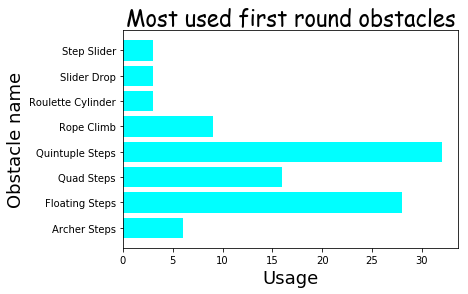

In [157]:

y_pos = np.arange(len(top_round_one_obstacles['obstacle_name']))

plt.barh(y_pos, top_round_one_obstacles['season'], align='center', color = 'cyan')
plt.yticks(y_pos, top_round_one_obstacles['obstacle_name'])
plt.xlabel('Usage', ** axisfont)
plt.ylabel('Obstacle name', **axisfont)
plt.title('Most used first round obstacles', **titlefont)
 
plt.show()

This bar chart shows the obstacles most frequently used in the first round on American Ninja Warrior. Only 5 obstacles have been used more than 5 times in the first round. Challengers beware, the first thing you may see are the 'Quintuple steps'. With more than 30 first round appearances the 'Quintuple steps' are the most used first round obstacle in show history. 

In [130]:
obstacle_in_season = obstacle_history.groupby(['season',]).count().reset_index()

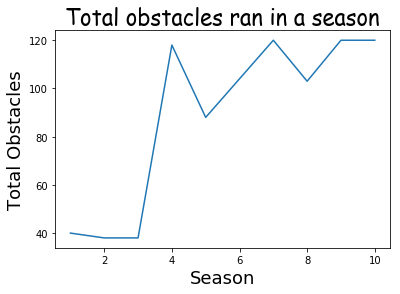

In [155]:
plt.title('Total obstacles ran in a season', ** titlefont)
plt.ylabel('Total Obstacles',** axisfont)
plt.xlabel('Season', **axisfont)
plt.plot(obstacle_in_season['season'], obstacle_in_season['obstacle_name'])

This chart shows the number of obstacles you would encounter if you lined every course in a season back-to-back. When the series switched to NBC in season four and added more cities there was also a jump in obstacle courses added compared to the first three seasons. Seasons four, seven, nine and ten all have 120 obstacles which is the current maximum. 

In [143]:
location = round_one_obstacles.groupby(['location']).count()
location = location.sort_values('season').reset_index()

# each city count has to be divided by 2 becuase theres two rounds in each city(qualifying and finals)
location.season /= 2

# Vegas has to be divided by 2 again becauase there are 4 stages at the Vegas finale
location.season[29:] /= 2
top_five_location = location[25:]
top_five_excluding = location[23:28]
print(location)

                location  season  round_stage  obstacle_name  obstacle_order
0                Atlanta     1.0            2              2               2
1              Southwest     1.0            2              2               2
2              Southeast     1.0            2              2               2
3   San Pedro (Military)     1.0            2              2               2
4            San Antonio     1.0            2              2               2
5             Pittsburgh     1.0            2              2               2
6                Orlando     1.0            2              2               2
7          Oklahoma City     1.0            2              2               2
8              Northwest     1.0            2              2               2
9              Northeast     1.0            2              2               2
10             St. Louis     1.0            2              2               2
11               Midwest     1.0            2              2               2

C:\Users\Benjamin\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<BarContainer object of 5 artists>

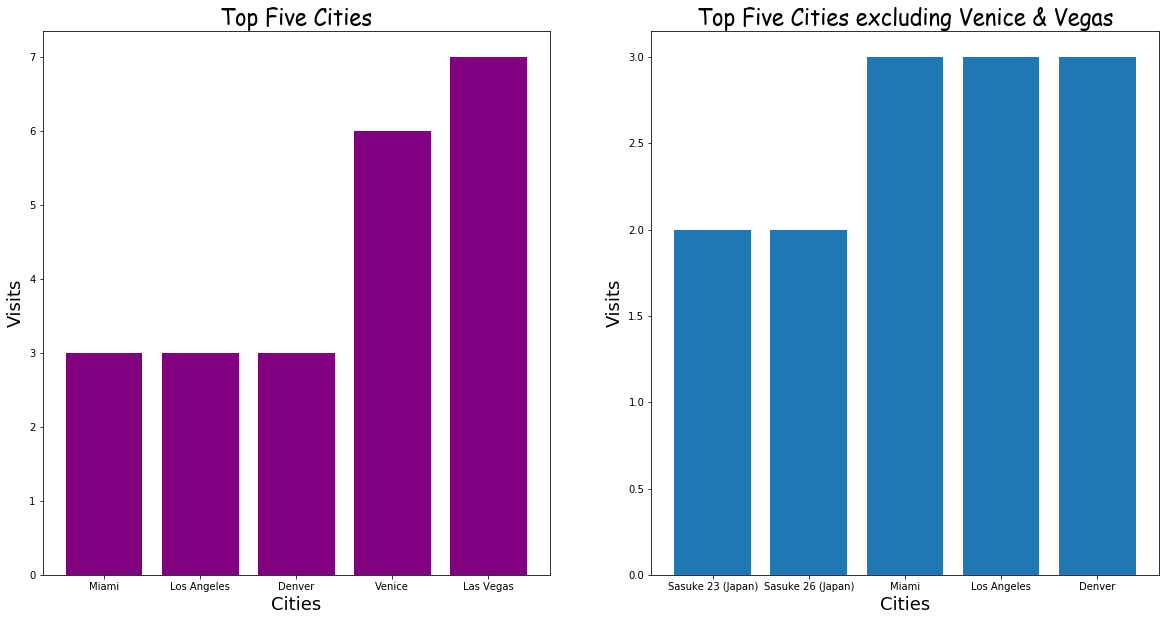

In [156]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.title('Top Five Cities', **titlefont)
plt.xlabel('Cities', **axisfont)
plt.ylabel('Visits', **axisfont)
plt.bar(top_five_location['location'], top_five_location['season'], color = 'purple' )

plt.subplot(1, 2, 2)
plt.title('Top Five Cities excluding Venice & Vegas', **titlefont)
plt.xlabel('Cities', **axisfont)
plt.ylabel('Visits', **axisfont)
plt.bar(top_five_excluding['location'], top_five_excluding['season'])

These left chart represents the top five cities that American Ninja Warrior has visited to film thier show. Since the first three seasons were based in Venice and every final after the NBC broadcasting switch has been based in Las Vegas those two cities have the highest amount of visits. The chart one the right represents the top five cities if we were to exclude venice and Las Vegas. 

In [192]:
obstacle_history.groupby(['obstacle_name']).sum()
total_obstacle_count = obstacle_history.groupby(['obstacle_name']).count()
total_obstacle_count = total_obstacle_count.sort_values('season').reset_index()
print(total_obstacle_count)

               obstacle_name  season  location  round_stage  obstacle_order
0           Shin Cliffhanger       1         1            1               1
1                 Ledge Jump       1         1            1               1
2               Chain Seesaw       1         1            1               1
3                Razor Beams       1         1            1               1
4              Circle Slider       1         1            1               1
5               Stick Slider       1         1            1               1
6                Clear Climb       1         1            1               1
7                Cliffhanger       1         1            1               1
8                  Coin Flip       1         1            1               1
9               Tarzan Swing       1         1            1               1
10           Psycho Chainsaw       1         1            1               1
11                   Timbers       1         1            1               1
12        Sw

In [194]:
top_ten_obstacles = total_obstacle_count[-10:]
bottom_ten_obstacles = total_obstacle_count[:10]



Text(0.5, 1.0, 'Least used obstacles')

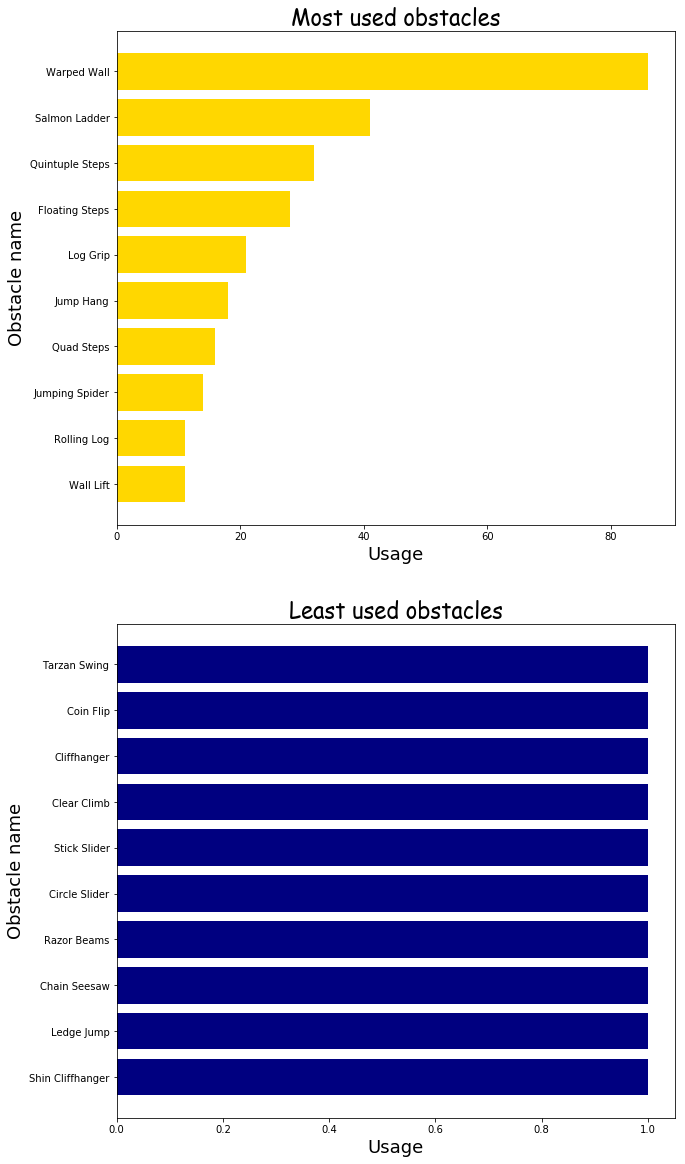

In [195]:
plt.figure(figsize=(10, 20))

plt.subplot(2, 1, 1)
y_pos1 = np.arange(len(top_ten_obstacles['obstacle_name']))

plt.barh(y_pos1, top_ten_obstacles['season'], align = 'center',color = 'gold')
plt.yticks(y_pos1, top_ten_obstacles['obstacle_name'])
plt.xlabel('Usage', ** axisfont)
plt.ylabel('Obstacle name', **axisfont)
plt.title('Most used obstacles', **titlefont)

plt.subplot(2, 1, 2)
y_pos2 = np.arange(len(bottom_ten_obstacles['obstacle_name']))

plt.barh(y_pos2, bottom_ten_obstacles['season'], align = 'center',color = 'navy')
plt.yticks(y_pos2, bottom_ten_obstacles['obstacle_name'])
plt.xlabel('Usage', ** axisfont)
plt.ylabel('Obstacle name', **axisfont)
plt.title('Least used obstacles', **titlefont)

In this subplot we examine the usage of Obstacles throughout a 10-season history of American Ninja Warrior. The top graphic shows the most used obstacles with the warped wall which is a staple of the show leading the count by far. The bottom graphic shows the least used with each obstacle coming in at only one use during the history of the show 